# Machine Learning Regression Algorithms Using SNP additive effect FOR FEATURE SELECTION--> NOT CAIDE
1 Random Forest Regressor 
2. Lasso Regressor or Elastic 
3. Gradient Boosted Trees( eg. XGBoost)

In [1]:
#Give me some of packages I need to import for ML regression of the followwing 
#Random Forest Regressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score


#for Lasso or elastic net regression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV

#for XGBoost
from xgboost import XGBRegressor
from xgboost import plot_importance
from xgboost import plot_tree
import os 
#chnage directory C:\Users\gsent\Desktop\3rd Year Research(NOT_SURE)\Dissertation\Python Code\2nd Semester
os.chdir("C:\\Users\\gsent\\Desktop\\3rd Year Research(NOT_SURE)\\Dissertation\\Python Code\\2nd Semester")


In [3]:
brain_df = pd.read_csv("Connectivity_Indexed.csv")
snp_df = pd.read_csv('Filtered_Participant_SNP.csv')
snp_names = pd.read_excel('20_SNP.xlsx')

X = brain_df[['DMN 1', 'DMN 2', 'DMN 3', 'DMN 4', 'SMN 1', 'SMN 2', 'SMN 3', 'SMN 4', 'SMN 5', 'SMN 6', 
              'SMN 7', 'SMN 8', 'SMN 9', 'SMN 10', 'SMN 11', 'SMN 12', 'SMN 13', 'SMN 14', 'SN 1', 'SN 2', 
              'SN 3', 'SN 4', 'SN 5', 'SN 6', 'DAN 1', 'DAN 2', 'DAN 3', 'DAN 4', 'DAN 5', 'DAN 6', 'DAN 7', 
              'DAN 8', 'DAN 9', 'DAN 10', 'DAN 11', 'CN 1', 'CN 2', 'CN 3', 'CN 4', 'CN 5', 'CN 6', 'VN 1', 
              'VN 2', 'VN 3', 'VN 4', 'VN 5', 'VN 6', 'VN 7', 'VN 8', 'VN 9', 'VN 10']]


Z = snp_df[['rs28394864_A', 'rs602602_A', 'rs12151021_A', 'rs429358_C', 'rs1354106_G', 'rs4663105_C', 
            'rs6069737_T', 'rs679515_T', 'rs1582763_A', 'rs1532278_A', 'rs561655_G', 'rs11218343_G', 
            'rs7146179_A', 'rs12590654_A', 'rs1846190_A', 'rs187370608_A', 'rs9369716_T', 'rs7912495_G', 
            'rs7384878_C', 'rs3935067_C']]

# Rename SNP columns with gene names
for i, col in enumerate(Z.columns):
    match = snp_names[snp_names['Lead Variant'].str[:6] == col[:6]]
    if not match.empty:
        Z.columns.values[i] = match['Gene'].values[0]

snp_labels = Z.columns.tolist()  # Save labels before converting
network_labels = X.columns.tolist()

X_centered = X - X.mean()
X = X_centered.to_numpy()
# Try one of the options
Z_centered = Z - Z.mean()
Z = Z_centered.to_numpy()

# scale data 
Z_scaled = Z_centered / np.std(Z_centered, axis=0)
X_scaled = X_centered / np.std(X_centered, axis=0)





In [4]:
# random forest regressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume X and Z are centered NumPy arrays at this point
feature_names = network_labels
snp_names = snp_labels

n_snps = Z.shape[1]
n_features = X.shape[1]
n_subjects = X.shape[0]

# Store importances for each SNP
all_importances = np.zeros((n_snps, n_features))
all_r2 = []

for i in range(n_snps):
    y = Z[:, i]
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    importances = model.feature_importances_
    all_importances[i] = importances
    
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    all_r2.append(r2)

# Average importances across all SNPs
mean_importance = np.mean(all_importances, axis=0)
feature_ranks = np.argsort(mean_importance)[::-1]
top_features = [feature_names[i] for i in feature_ranks]

# Plot average importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), mean_importance[feature_ranks], tick_label=top_features)
plt.gca().invert_yaxis()
plt.title("Average Feature Importance Across All SNPs")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()

# Now: Evaluate top N features from 1 to 20
r2_topn = []

for n in range(1, 21):
    selected_idxs = feature_ranks[:n]
    X_subset = X[:, selected_idxs]

    r2_scores_n = []
    for i in range(n_snps):
        y = Z[:, i]
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_subset, y)
        y_pred = model.predict(X_subset)
        r2_scores_n.append(r2_score(y, y_pred))
    
    r2_topn.append(np.mean(r2_scores_n))

# Plot how R² evolves with number of features
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), r2_topn, marker='o')
plt.title("Average R² Across SNPs by Top-N Features")
plt.xlabel("Number of Top Brain Features Used")
plt.ylabel("Mean R²")
plt.grid(True)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [5]:
print("Top 20 features based on average importance:")
for i in range(20):
    print(f"{i+1}: {top_features[i]} - Importance: {mean_importance[feature_ranks[i]]:.4f}")
print("\nAverage R² for each number of features:")
for i, r2 in enumerate(r2_topn):
    print(f"Top {i+1} features: R² = {r2:.4f}")


Top 20 features based on average importance:


NameError: name 'top_features' is not defined

In [6]:

print("Top 20 features based on average importance:")
for i in range(20):
    print(f"'{top_features[i]}',") 


Top 20 features based on average importance:


NameError: name 'top_features' is not defined

DOes this make sense --> the above figure. Cause this is purely saying that two features are good enough to predict the SNP by 

# LASSO/ELastic CV Feature Selection


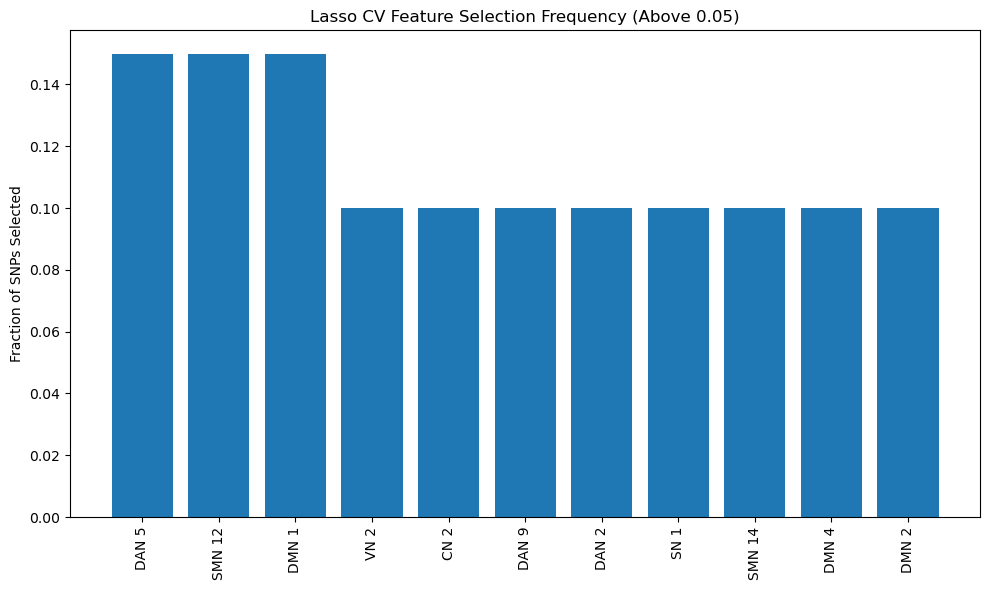

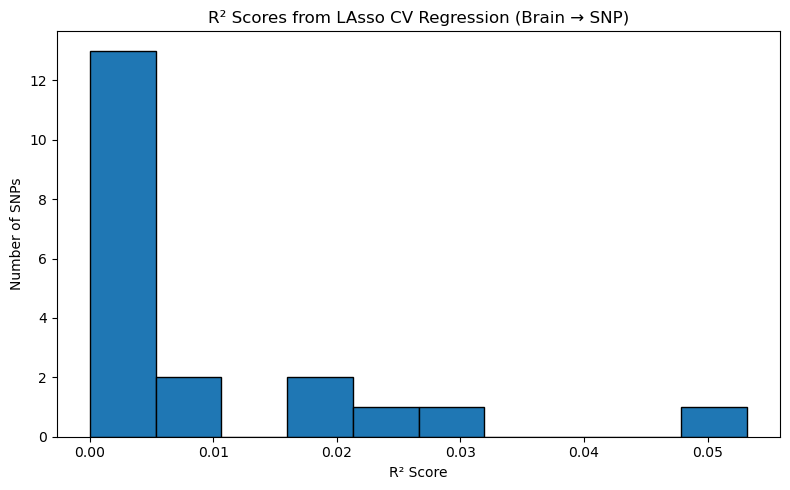

Top 20 features based on selection frequency:
1: DMN 1 - Selection Frequency: 0.1500
2: SMN 12 - Selection Frequency: 0.1500
3: DAN 5 - Selection Frequency: 0.1500
4: CN 2 - Selection Frequency: 0.1000
5: DMN 2 - Selection Frequency: 0.1000
6: DMN 4 - Selection Frequency: 0.1000
7: SMN 14 - Selection Frequency: 0.1000
8: SN 1 - Selection Frequency: 0.1000
9: DAN 9 - Selection Frequency: 0.1000
10: DAN 2 - Selection Frequency: 0.1000
11: VN 2 - Selection Frequency: 0.1000
12: CN 6 - Selection Frequency: 0.0500
13: DAN 4 - Selection Frequency: 0.0500
14: SMN 11 - Selection Frequency: 0.0500
15: VN 6 - Selection Frequency: 0.0500
16: SMN 13 - Selection Frequency: 0.0500
17: SMN 8 - Selection Frequency: 0.0500
18: VN 4 - Selection Frequency: 0.0500
19: SMN 7 - Selection Frequency: 0.0500
20: CN 5 - Selection Frequency: 0.0500
['DMN 1', 'SMN 12', 'DAN 5', 'CN 2', 'DMN 2', 'DMN 4', 'SMN 14', 'SN 1', 'DAN 9', 'DAN 2', 'VN 2', 'CN 6', 'DAN 4', 'SMN 11', 'VN 6', 'SMN 13', 'SMN 8', 'VN 4', 'SMN 

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# Scale X to unit variance only (mean already centered)
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_centered)
scaler.fit(Z_centered)
Z_scaled = scaler.transform(Z_centered)


n_snps = Z.shape[1]
n_features = X_scaled.shape[1]
n_subjects = X_scaled.shape[0]

lasso_r2 = []
lasso_selected_counts = np.zeros(n_features)
lasso_coefs = np.zeros((n_snps, n_features))  # Store coefficients per SNP

for i in range(n_snps):
    y = Z_scaled[:, i]
    
    model = ElasticNetCV(cv=5, random_state=42, l1_ratio=1) # L1 ratio of 1= full Lasso
    model.fit(X_scaled, y)
    
    y_pred = model.predict(X_scaled)
    r2 = r2_score(y, y_pred)
    lasso_r2.append(r2)
    
    coefs = model.coef_
    lasso_coefs[i] = coefs
    lasso_selected_counts += (coefs != 0).astype(int)

# Compute selection frequency and mean coefficient magnitude
feature_selection_freq = lasso_selected_counts / n_snps
mean_coef_magnitude = np.mean(np.abs(lasso_coefs), axis=0)

# Filter features with selection frequency above 0.05
filtered_idx = np.where(feature_selection_freq > 0.05)[0]
filtered_features = [network_labels[i] for i in filtered_idx]
filtered_frequencies = feature_selection_freq[filtered_idx]

# Sort filtered features by frequency in descending order
sorted_indices = np.argsort(filtered_frequencies)[::-1]
sorted_filtered_features = [filtered_features[i] for i in sorted_indices]
sorted_filtered_frequencies = filtered_frequencies[sorted_indices]

# Plot the selection frequency of the filtered features in descending order (vertical bar plot)
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_filtered_features)), sorted_filtered_frequencies, tick_label=sorted_filtered_features)
plt.xticks(rotation=90)
plt.title("Lasso CV Feature Selection Frequency (Above 0.05)")
plt.ylabel("Fraction of SNPs Selected")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(lasso_r2, bins=10, edgecolor='black')
plt.title("R² Scores from LAsso CV Regression (Brain → SNP)")
plt.xlabel("R² Score")
plt.ylabel("Number of SNPs")
plt.tight_layout()
plt.show()

# Print top features sorted by selection frequency
sorted_by_freq_idx = np.argsort(feature_selection_freq)[::-1]
sorted_features_by_freq = [network_labels[i] for i in sorted_by_freq_idx]

print("Top 20 features based on selection frequency:")
for i in range(20):
    print(f"{i+1}: {sorted_features_by_freq[i]} - Selection Frequency: {feature_selection_freq[sorted_by_freq_idx[i]]:.4f}")

print(sorted_features_by_freq[:20])

#create a new array with the top 20 features
top_features = np.array(sorted_features_by_freq[:20])

for i, r2 in enumerate(lasso_r2):
    print(f"SNP {i+1}: R² = {r2:.4f}")


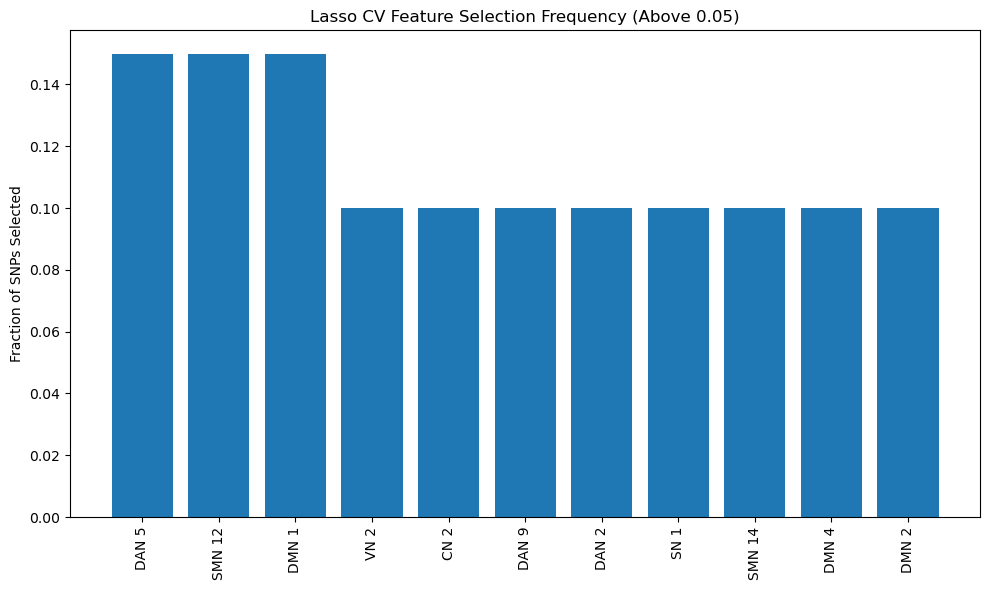

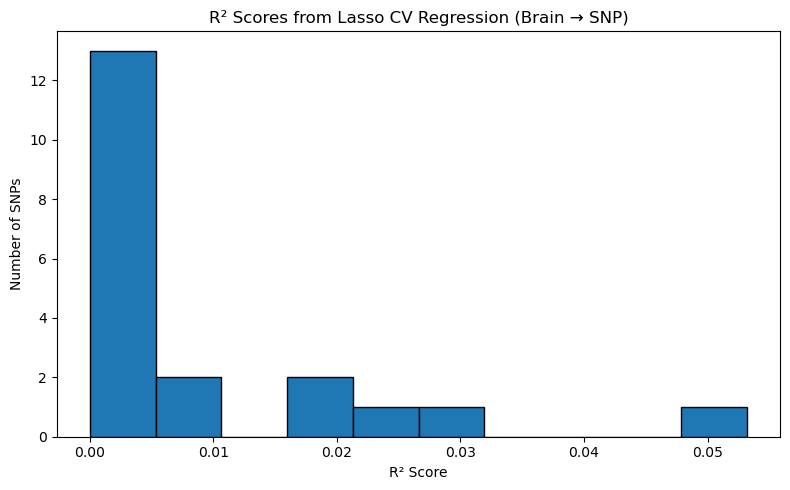

Top 20 features based on selection frequency:
1: DMN 1 - Selection Frequency: 0.1500
2: SMN 12 - Selection Frequency: 0.1500
3: DAN 5 - Selection Frequency: 0.1500
4: CN 2 - Selection Frequency: 0.1000
5: DMN 2 - Selection Frequency: 0.1000
6: DMN 4 - Selection Frequency: 0.1000
7: SMN 14 - Selection Frequency: 0.1000
8: SN 1 - Selection Frequency: 0.1000
9: DAN 9 - Selection Frequency: 0.1000
10: DAN 2 - Selection Frequency: 0.1000
11: VN 2 - Selection Frequency: 0.1000
12: CN 6 - Selection Frequency: 0.0500
13: DAN 4 - Selection Frequency: 0.0500
14: SMN 11 - Selection Frequency: 0.0500
15: VN 6 - Selection Frequency: 0.0500
16: SMN 13 - Selection Frequency: 0.0500
17: SMN 8 - Selection Frequency: 0.0500
18: VN 4 - Selection Frequency: 0.0500
19: SMN 7 - Selection Frequency: 0.0500
20: CN 5 - Selection Frequency: 0.0500
SNP 1: R² = 0.0000
SNP 2: R² = 0.0221
SNP 3: R² = 0.0000
SNP 4: R² = 0.0000
SNP 5: R² = 0.0000
SNP 6: R² = 0.0000
SNP 7: R² = 0.0000
SNP 8: R² = 0.0204
SNP 9: R² = 0.

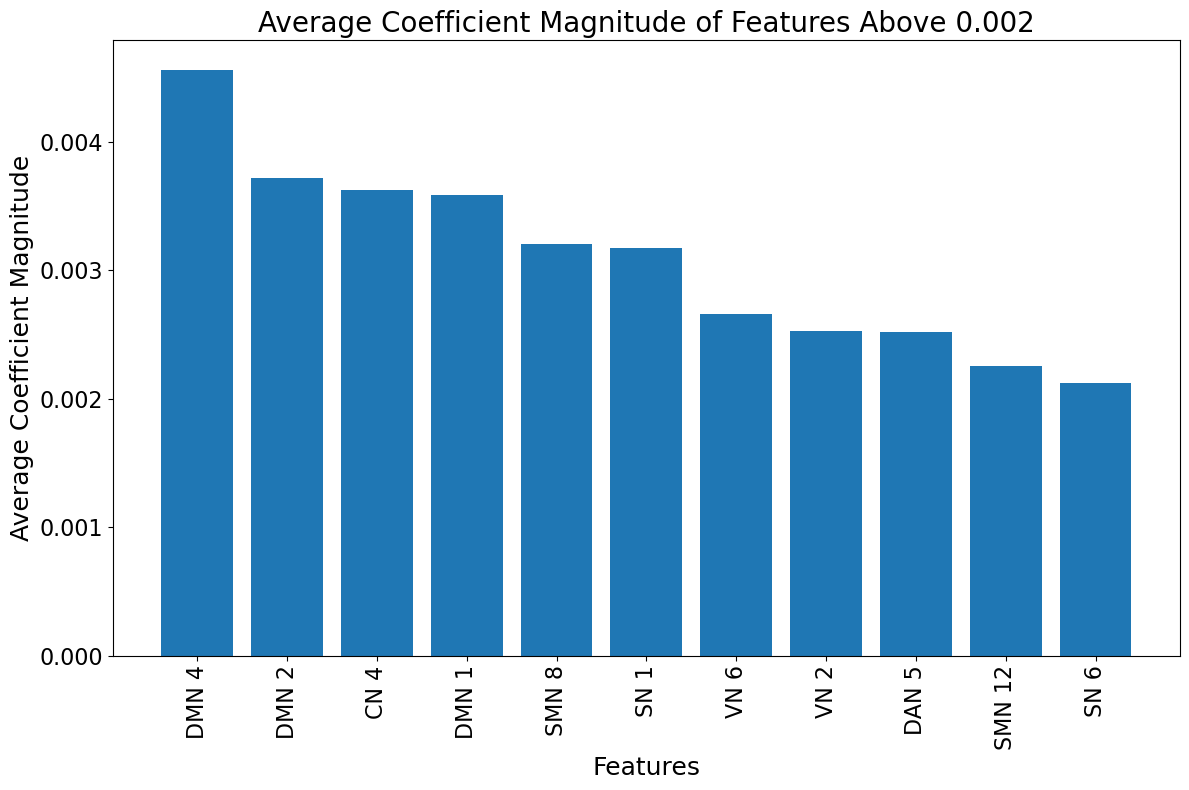

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# SNPs as output variables (Z = SNPs)
n_snps = Z_scaled.shape[1]
n_features = X_scaled.shape[1]
n_subjects = X_scaled.shape[0]

lasso_r2 = []
lasso_selected_counts = np.zeros(n_features)
lasso_coefs = np.zeros((n_snps, n_features))  # Store coefficients per SNP

for i in range(n_snps):
    y = Z_scaled[:, i]  # Predict SNP i from brain network features

    model = ElasticNetCV(cv=5, random_state=42, l1_ratio=1)
    model.fit(X_scaled, y)

    y_pred = model.predict(X_scaled)
    r2 = r2_score(y, y_pred)
    lasso_r2.append(r2)

    coefs = model.coef_
    lasso_coefs[i] = coefs
    lasso_selected_counts += (coefs != 0).astype(int)

# Compute selection frequency and mean coefficient magnitude
feature_selection_freq = lasso_selected_counts / n_snps
mean_coef_magnitude = np.mean(np.abs(lasso_coefs), axis=0)

# === Filter by selection frequency > 0.05
filtered_idx = np.where(feature_selection_freq > 0.05)[0]
filtered_features = [network_labels[i] for i in filtered_idx]
filtered_frequencies = feature_selection_freq[filtered_idx]

# Sort descending
sorted_indices = np.argsort(filtered_frequencies)[::-1]
sorted_filtered_features = [filtered_features[i] for i in sorted_indices]
sorted_filtered_frequencies = filtered_frequencies[sorted_indices]

# === Plot: Selection Frequency
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_filtered_features)), sorted_filtered_frequencies, tick_label=sorted_filtered_features)
plt.xticks(rotation=90)
plt.title("Lasso CV Feature Selection Frequency (Above 0.05)")
plt.ylabel("Fraction of SNPs Selected")
plt.tight_layout()
plt.show()

# === Plot: Histogram of R²
plt.figure(figsize=(8, 5))
plt.hist(lasso_r2, bins=10, edgecolor='black')
plt.title("R² Scores from Lasso CV Regression (Brain → SNP)")
plt.xlabel("R² Score")
plt.ylabel("Number of SNPs")
plt.tight_layout()
plt.show()

# === Top 20 Features by Selection Frequency
sorted_by_freq_idx = np.argsort(feature_selection_freq)[::-1]
sorted_features_by_freq = [network_labels[i] for i in sorted_by_freq_idx]

print("Top 20 features based on selection frequency:")
for i in range(min(20, len(sorted_features_by_freq))):
    freq = feature_selection_freq[sorted_by_freq_idx[i]]
    print(f"{i+1}: {sorted_features_by_freq[i]} - Selection Frequency: {freq:.4f}")

top_features = np.array(sorted_features_by_freq[:20])

# === Print individual R² values
for i, r2 in enumerate(lasso_r2):
    print(f"SNP {i+1}: R² = {r2:.4f}")

# === Top Features by Coefficient Magnitude
print("\nTop 20 features based on average coefficient magnitude:")
sorted_by_mag_idx = np.argsort(mean_coef_magnitude)[::-1]
for i in range(min(20, len(sorted_by_mag_idx))):
    idx = sorted_by_mag_idx[i]
    print(f"{i+1}: {network_labels[idx]} - Average Coefficient Magnitude: {mean_coef_magnitude[idx]:.4f}")

# === Filter by coefficient magnitude > 0.002
filtered_idx = np.where(mean_coef_magnitude > 0.002)[0]
filtered_features = [network_labels[i] for i in filtered_idx]
filtered_magnitudes = mean_coef_magnitude[filtered_idx]

# Sort
sorted_indices = np.argsort(filtered_magnitudes)[::-1]
sorted_filtered_features = [filtered_features[i] for i in sorted_indices]
sorted_filtered_magnitudes = filtered_magnitudes[sorted_indices]

# === Plot: Magnitude of Coefficients
plt.figure(figsize=(12, 8))
plt.bar(range(len(sorted_filtered_features)), sorted_filtered_magnitudes, tick_label=sorted_filtered_features)
plt.xticks(rotation=90)
plt.title("Average Coefficient Magnitude of Features Above 0.002", fontsize=20)

plt.xlabel("Features", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel("Average Coefficient Magnitude", fontsize=18)
plt.tight_layout()
plt.show()


In [12]:
#just to copy to clipboard
print("Top 20 features based on average coefficient magnitude:")
for i in range(20):
    print(f"'{top_features[i]}',")

Top 20 features based on average coefficient magnitude:


NameError: name 'top_features' is not defined

# XGBoost  

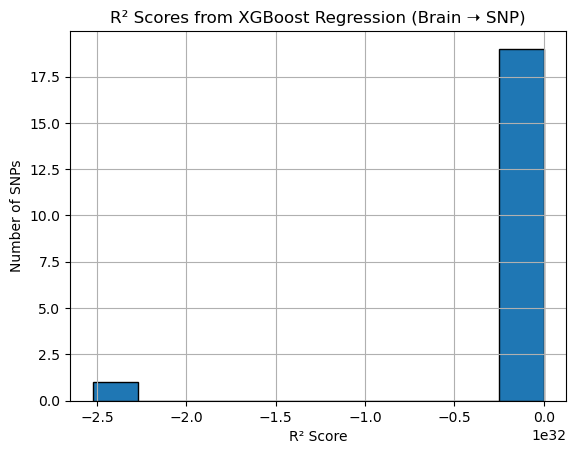

Top 20 features based on average coefficient magnitude:
'DAN 7',
'VN 4',
'SN 6',
'DAN 1',
'CN 4',
'CN 6',
'SN 4',
'DAN 10',
'VN 2',
'SMN 13',
'DAN 2',
'DAN 11',
'SN 5',
'SMN 14',
'SMN 6',
'DAN 9',
'VN 8',
'SMN 12',
'CN 3',
'DAN 6',


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
# Assume X and Z are centered NumPy arrays at this point
feature_names = network_labels
snp_names = snp_labels

n_snps = Z.shape[1]
n_features = X.shape[1]
n_subjects = X.shape[0]

# XGBoost per SNP
from collections import defaultdict
r2_scores = []
feature_importances = defaultdict(list)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i in range(Z.shape[1]):
    y = Z[:, i]
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
    
    r2_cv = cross_val_score(model, X, y, scoring='r2', cv=kf).mean()
    r2_scores.append(r2_cv)
    
    # Fit once to extract feature importance
    model.fit(X, y)
    importances = model.feature_importances_
    for j, imp in enumerate(importances):
        feature_importances[j].append(imp)

# Plot R² scores distribution
plt.hist(r2_scores, bins=10, edgecolor='black')
plt.title("R² Scores from XGBoost Regression (Brain ➝ SNP)")
plt.xlabel("R² Score")
plt.ylabel("Number of SNPs")
plt.grid()
plt.show()

# Show top N most consistently important features
avg_importance = {j: np.mean(imps) for j, imps in feature_importances.items()}
top_features_idx = sorted(avg_importance, key=avg_importance.get, reverse=True)[:20]
top_features = [network_labels[i] for i in top_features_idx]


print("Top 20 features based on average coefficient magnitude:")
for i in range(20):
    print(f"'{top_features[i]}',")

In [34]:
import pandas as pd
import numpy as np

# Load data
brain_df = pd.read_csv("Connectivity_Indexed.csv")

# Define component groups
network_groups = {
    'DMN': [col for col in brain_df.columns if col.startswith('DMN')],
    'SMN': [col for col in brain_df.columns if col.startswith('SMN')],
    'SN':  [col for col in brain_df.columns if col.startswith('SN')],
    'DAN': [col for col in brain_df.columns if col.startswith('DAN')],
    'CN':  [col for col in brain_df.columns if col.startswith('CN')],
    'VN':  [col for col in brain_df.columns if col.startswith('VN')],
}

# Center the data
X_centered = brain_df - brain_df.mean()

# Calculate variance per network
network_variances = {}
for network, columns in network_groups.items():
    component_vars = X_centered[columns].var()  # variance per component
    network_variances[network] = component_vars.mean()  # average variance within network

# Convert to DataFrame for display
variance_df = pd.DataFrame.from_dict(network_variances, orient='index', columns=['Average Variance'])
variance_df = variance_df.sort_values(by='Average Variance', ascending=False)



TypeError: Could not convert ['CB001CB002CB004CB005CB006CB007CB009CB010CB011CB012CB013CB014CB015CB016CB017CB018CB019CB024CB025CB026CB028CB029CB031CB032CB033CB034CB035CB036CB037CB038CB039CB042CB043CB044CB045CB074CB076CB077CB079CB080CB081CB082CB083CB084CB085CB086CB087CB088CB089CB090CB091CB092CB093CB094CB095CB096CB097CB098CB100DB001DB002DB003DB004DB005DB006DB007DB009DB010DB011DB012DB013DB014DB015DB016DB017DB018DB019DB020DB022DB023DB024DB026DB028DB029DB030DB031DB032DB033DB034DB035DB036DB037DB039DB040DB041DB042DB043DB044DB045DB046DB047DB048DB049DB050DB051DB052DB053DB054DB055DB056DB057DB058DB059DB060DB061DB062DB063DB065DB067DB068DB069DB070DB071DB072DB073DB074DB075DB076DB077DB078DB079DB080DB081DB082DB083DB084DB085DB089DB090DB091DB093DB095DB097DB098DB099ED002ED008ED010ED013ED015ED016ED017ED018ED023ED024ED025ED027ED030ED032ED033ED034ED035ED036ED038ED043ED044ED046ED048ED050ED051ED052ED053ED054ED055ED056ED057ED058ED059ED061ED062ED064ED065ED066ED067ED068ED070ED071ED072ED073ED074ED076ED077ED078ED079ED080ED081ED082ED083ED084ED085ED087ED088ED089ED090ED091ED092ED093ED094ED096ED097ED099ED100ED101ED102ED103ED104ED105ED106ED109ED110ED111ED112ED113ED115ED116ED117ED120ED121ED122ED123ED124ED125ED126ED127ED130ED131ED132ED133ED134ED135ED136ED137ED139ED140ED142ED143ED145ED147ED148ED149ED151ED152ED153ED154ED155ED156ED157ED158ED159ED160ED161ED162ED163ED164ED166ED167ED168ED169ED172ED174ED175ED176ED178ED179ED181ED182ED184ED185ED186ED187ED188ED189ED190ED191ED192ED193ED194ED196ED197ED199ED200ED201ED202ED203ED204ED205ED207ED208ED215ED216ED217ED218ED219ED221ED222ED223OX001OX002OX003OX006OX007OX008OX010OX011OX012OX013OX015OX016OX018OX019OX020OX022OX024OX025OX026OX027OX028OX030OX033OX034OX036OX037OX038OX039OX041OX044WL003WL005WL006WL007WL008WL009WL011WL012WL014WL017WL022WL023WL024WL025WL026WL027WL029WL030WL032WL033WL034WL037WL038WL039WL040WL041WL042WL044WL047WL049WL050WL051WL055WL056WL057WL058WL061WL063WL065WL066WL068WL069WL070WL071WL075WL076WL077WL078WL081WL082WL084WL085WL087WL088WL089WL091WL092WL093WL097WL098WL099WL100WL101WL103WL104WL105WL108WL109WL110WL111WL112WL113WL114WL115WL116WL117WL118WL119WL120WL121WL123WL124WL125WL126WL127WL130WL131WL133WL134WL135WL136WL137WL138WL139WL141WL142WL143WL144WL146WL149WL150WL151WL153WL154WL155WL157WL158WL159WL161WL163WL164WL165WL166WL167WL168WL169WL170WL173WL174WL175WL176WL177WL178WL180WL181WL182WL183WL185WL187WL188WL189WL190WL192WL193WL194WL195WL196WL197WL198WL199WL202WL203WL204WL205WL206WL208'] to numeric

In [37]:
# Calculate variance for individual components (clusters)
component_variances = X_centered.var()

# Convert to DataFrame
component_var_df = component_variances.reset_index()
component_var_df.columns = ['Component', 'Variance']
component_var_df = component_var_df.sort_values(by='Variance', ascending=False)

print("Top 20 components based on variance:")
for i in range(20):
    print(f"{i+1}: {component_var_df.iloc[i]['Component']} - Variance: {component_var_df.iloc[i]['Variance']:.4f}")
print("\nTop 20 networks based on average variance:")

Top 20 components based on variance:
1: CN 6 - Variance: 3.9685
2: DMN 2 - Variance: 3.8176
3: VN 9 - Variance: 3.6890
4: DAN 3 - Variance: 3.3301
5: VN 7 - Variance: 3.1528
6: SN 5 - Variance: 3.1199
7: DAN 2 - Variance: 3.0591
8: SN 2 - Variance: 3.0268
9: VN 4 - Variance: 2.9764
10: SMN 11 - Variance: 2.9399
11: DAN 5 - Variance: 2.8089
12: DAN 7 - Variance: 2.7821
13: DMN 1 - Variance: 2.7562
14: SMN 14 - Variance: 2.6780
15: DAN 9 - Variance: 2.6743
16: DAN 10 - Variance: 2.5745
17: DAN 6 - Variance: 2.4040
18: CN 2 - Variance: 2.3959
19: SMN 9 - Variance: 2.2931
20: SN 3 - Variance: 2.2546

Top 20 networks based on average variance:


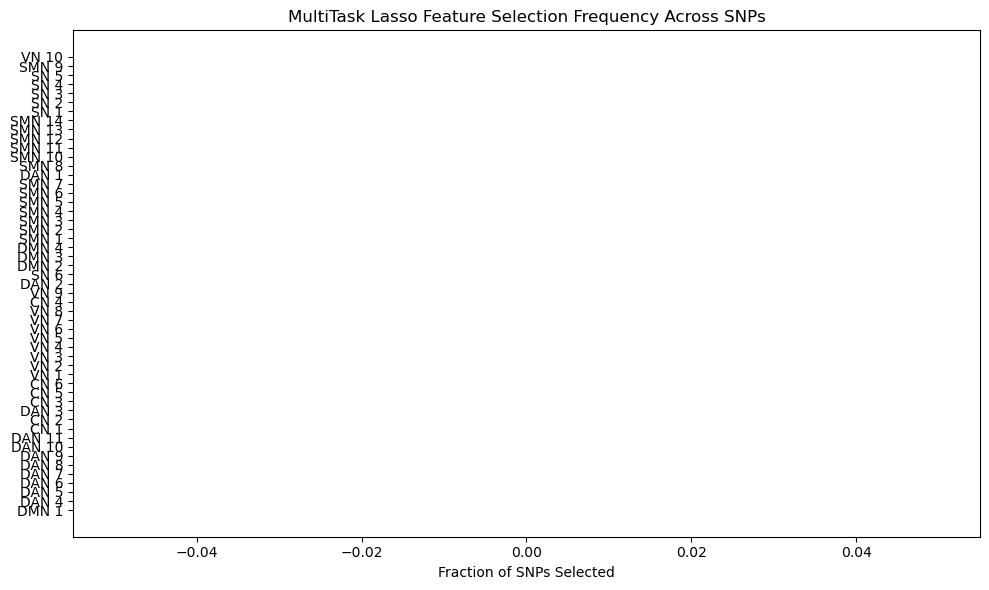

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

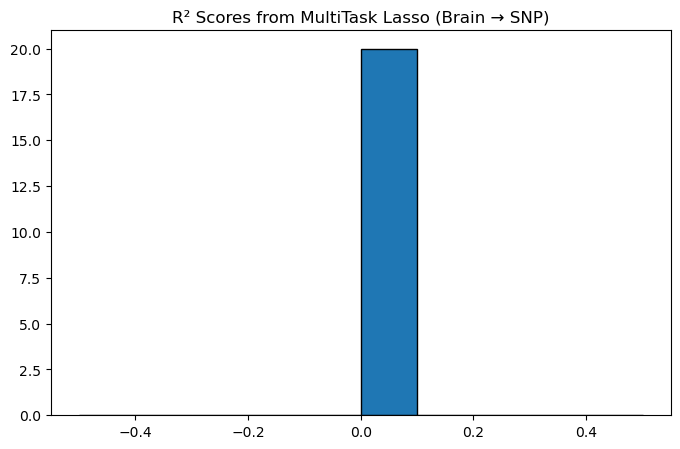

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# Scale X to unit variance (mean assumed centered)
scaler_X = StandardScaler(with_mean=False)
X_scaled = scaler_X.fit_transform(X_centered)

scaler_Z = StandardScaler()
Z_scaled = scaler_Z.fit_transform(Z_centered)

n_snps = Z.shape[1]
n_features = X_scaled.shape[1]

# Fit multitask lasso (one model for all SNPs)
model = MultiTaskLassoCV(cv=5, random_state=42)
model.fit(X_scaled, Z_scaled)

# Predict and compute R² for all SNPs jointly
Z_pred = model.predict(X_scaled)
r2_per_snp = [
    r2_score(Z_scaled[:, i], Z_pred[:, i]) for i in range(n_snps)
]

# Analyze coefficients
coefs = model.coef_  # shape: (n_snps, n_features)
feature_selection_freq = (coefs != 0).sum(axis=0) / n_snps
mean_coef_magnitude = np.mean(np.abs(coefs), axis=0)

# Sort features by mean coefficient magnitude
sorted_idx = np.argsort(mean_coef_magnitude)[::-1]
top_features = [network_labels[i] for i in sorted_idx]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(np.array(network_labels)[sorted_idx], feature_selection_freq[sorted_idx])
plt.gca().invert_yaxis()
plt.title("MultiTask Lasso Feature Selection Frequency Across SNPs")
plt.xlabel("Fraction of SNPs Selected")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(r2_per_snp, bins=10, edgecolor='black')
plt.title("R² Scores from MultiTask Lasso (Brain → SNP)")
plt.xlabel



Top 20 networks by average coefficient magnitude (MultiTask Lasso):
1: VN 10 - Mean |coef|: 0.0000
2: SMN 9 - Mean |coef|: 0.0000
3: SN 5 - Mean |coef|: 0.0000
4: SN 4 - Mean |coef|: 0.0000
5: SN 3 - Mean |coef|: 0.0000
6: SN 2 - Mean |coef|: 0.0000
7: SN 1 - Mean |coef|: 0.0000
8: SMN 14 - Mean |coef|: 0.0000
9: SMN 13 - Mean |coef|: 0.0000
10: SMN 12 - Mean |coef|: 0.0000
11: SMN 11 - Mean |coef|: 0.0000
12: SMN 10 - Mean |coef|: 0.0000
13: SMN 8 - Mean |coef|: 0.0000
14: DAN 1 - Mean |coef|: 0.0000
15: SMN 7 - Mean |coef|: 0.0000
16: SMN 6 - Mean |coef|: 0.0000
17: SMN 5 - Mean |coef|: 0.0000
18: SMN 4 - Mean |coef|: 0.0000
19: SMN 3 - Mean |coef|: 0.0000
20: SMN 2 - Mean |coef|: 0.0000


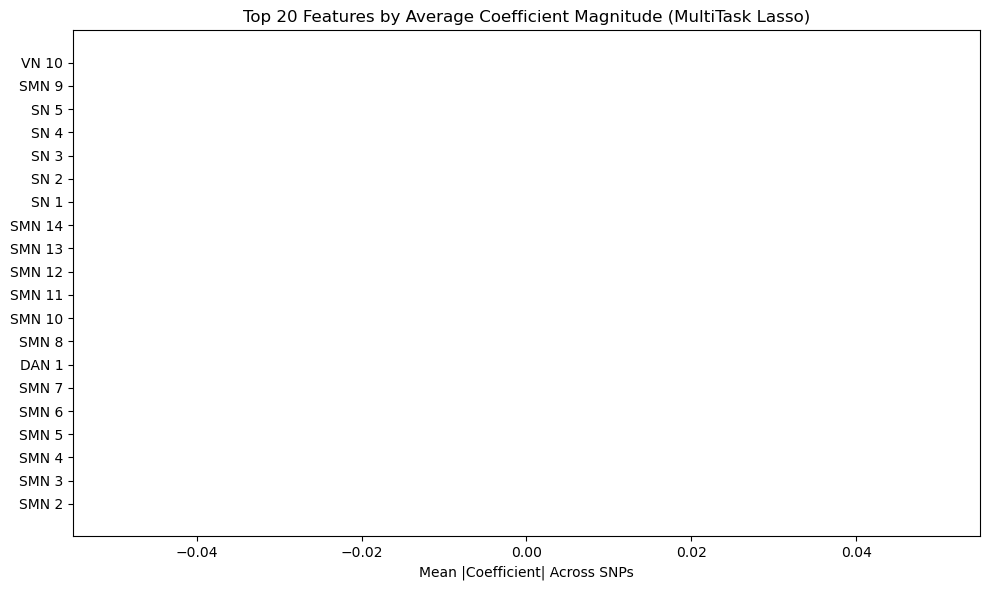

In [6]:
# === Top 20 networks by mean coefficient magnitude ===
print("\nTop 20 networks by average coefficient magnitude (MultiTask Lasso):")
for i in range(20):
    idx = sorted_idx[i]
    print(f"{i+1}: {network_labels[idx]} - Mean |coef|: {mean_coef_magnitude[idx]:.4f}")

# === Plot average coefficient magnitude of top 20 features ===
plt.figure(figsize=(10, 6))
plt.barh([network_labels[i] for i in sorted_idx[:20]], mean_coef_magnitude[sorted_idx[:20]])
plt.gca().invert_yaxis()
plt.title("Top 20 Features by Average Coefficient Magnitude (MultiTask Lasso)")
plt.xlabel("Mean |Coefficient| Across SNPs")
plt.tight_layout()
plt.show()
